# 輪廓圖分析(Silhouette Analysis)

## 載入相關套件

In [1]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## 生成分類資料

In [3]:
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

## 訓練模型

In [4]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

## 輪廓係數

In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
silhouette_vals

## 繪製輪廓圖

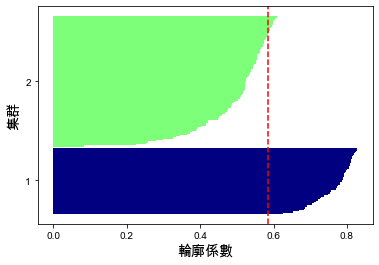

In [8]:
# 修正中文亂碼 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

# 輪廓圖
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
# 輪廓係數平均數的垂直線
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('集群', fontsize=14)
plt.xlabel('輪廓係數', fontsize=14);

## 使用3個集群訓練模型

In [24]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

## 繪製輪廓圖

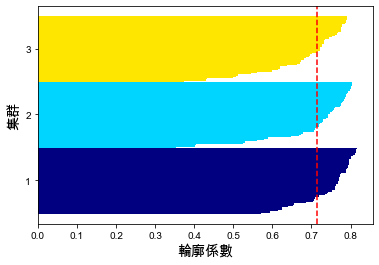

In [25]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# 輪廓圖
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
# 輪廓係數平均數的垂直線
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('集群', fontsize=14)
plt.xlabel('輪廓係數', fontsize=14);

## 計算輪廓分數

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y)

0.7143417887288687

## 依據輪廓分數找最佳集群數量

In [22]:
# 測試 2~10 群的分數
silhouette_score_list = []
print('輪廓分數:')
for i in range(2, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    y_km = km.fit_predict(X)  
    silhouette_score_list.append(silhouette_score(X, y_km))
    print(f'{i}:{silhouette_score_list[-1]:.2f}')

print(f'最大值 {np.argmax(silhouette_score_list)+2}: {np.max(silhouette_score_list):.2f}')

輪廓分數:
2:0.58
3:0.71
4:0.58
5:0.45
6:0.32
7:0.32
8:0.34
9:0.35
10:0.35
最大值 3: 0.71
